### 2. Comparar back-propagation (BP) de Keras

Previo a la utilización de la librería de Keras, se procede a normalizar los datos para que la diferencia entre las magnitudes de los atributos no interfieran con la ejecución del código.

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import keras
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import time


X_train,y_train = load_iris(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
#transform target to one hot vector
y_onehot = keras.utils.to_categorical(y_train)

Using TensorFlow backend.


a&b) Se define la arquitectura y el optimizador de la red.

In [3]:
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation="sigmoid"))
model.add(Dense(16, activation="sigmoid"))
model.add(Dense(3, activation="softmax"))

model.compile(optimizer=SGD(lr=0.1),loss="mse", metrics=["accuracy"])

c)

In [4]:
hist = model.fit(X_train, y_onehot,validation_split=0.1, epochs=100, batch_size=1, verbose=1)

Train on 135 samples, validate on 15 samples
Epoch 1/100
135/135 [==============================] - 3s 22ms/step - loss: 0.2299 - acc: 0.3111 - val_loss: 0.2518 - val_acc: 0.0000e+00
Epoch 2/100
135/135 [==============================] - 1s 5ms/step - loss: 0.2155 - acc: 0.4148 - val_loss: 0.2471 - val_acc: 0.0000e+00
Epoch 3/100
135/135 [==============================] - 1s 5ms/step - loss: 0.2003 - acc: 0.4963 - val_loss: 0.2547 - val_acc: 0.0000e+00
Epoch 4/100
135/135 [==============================] - 1s 5ms/step - loss: 0.1844 - acc: 0.5852 - val_loss: 0.2942 - val_acc: 0.0000e+00
Epoch 5/100
135/135 [==============================] - 1s 5ms/step - loss: 0.1620 - acc: 0.6296 - val_loss: 0.2127 - val_acc: 0.0000e+00
Epoch 6/100
135/135 [==============================] - 1s 5ms/step - loss: 0.1390 - acc: 0.6963 - val_loss: 0.1998 - val_acc: 0.0000e+00
Epoch 7/100
135/135 [==============================] - 1s 5ms/step - loss: 0.1218 - acc: 0.7852 - val_loss: 0.1947 - val_acc: 0.0000

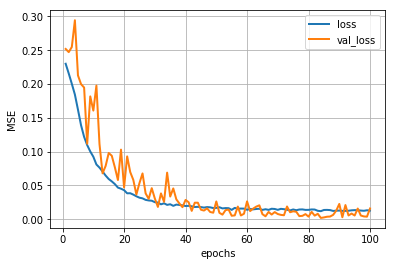

In [5]:
listaloss = []
listaval = []
for i in range(100):
    listaloss.append(hist.history['loss'][i])
    listaval.append(hist.history['val_loss'][i])

plt.plot(range(101)[1:],listaloss,label='loss', linewidth=2)
plt.plot(range(101)[1:],listaval,label='val_loss', linewidth=2)

plt.legend(['loss', 'val_loss'])
plt.ylabel('MSE')
plt.xlabel('epochs')
plt.grid(1)
plt.show()

c) Como se puede apreciar en el gráfico, el loss de entrenamiento se mueve entre 0.25 hasta 0.04 apróximadamente durante los primeros 20 epochs, mientras que para los 100 epochs restantes disminuye hasta los 0.0122. Por lo que visualmente se aprecia que el algoritmo corrido por la librería de Keras, ha de funcionar mejor que el algoritmo implementado en la sección anterior. Esto se puede deber a que el código de la sección anterior, no esta bien ejecutado o puede carecer de ciertas funciones y/o utilizaciones de algunos métodos que la líbreria ha de utilizar para un correcto desempeño.

In [6]:
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(3, activation="softmax"))

model.compile(optimizer=SGD(lr=0.1),loss="mse", metrics=["accuracy"])
hist = model.fit(X_train, y_onehot,validation_split=0.1, epochs=100, batch_size=1, verbose=1)

Train on 135 samples, validate on 15 samples
Epoch 1/100
135/135 [==============================] - 1s 6ms/step - loss: 0.1215 - acc: 0.7556 - val_loss: 0.1107 - val_acc: 0.7333
Epoch 2/100
135/135 [==============================] - 1s 5ms/step - loss: 0.0667 - acc: 0.8889 - val_loss: 0.0612 - val_acc: 1.0000
Epoch 3/100
135/135 [==============================] - 1s 5ms/step - loss: 0.0450 - acc: 0.9407 - val_loss: 0.0134 - val_acc: 1.0000
Epoch 4/100
135/135 [==============================] - 1s 5ms/step - loss: 0.0327 - acc: 0.9333 - val_loss: 0.0101 - val_acc: 1.0000
Epoch 5/100
135/135 [==============================] - 1s 5ms/step - loss: 0.0277 - acc: 0.9556 - val_loss: 0.0130 - val_acc: 1.0000
Epoch 6/100
135/135 [==============================] - 1s 5ms/step - loss: 0.0202 - acc: 0.9630 - val_loss: 0.0174 - val_acc: 1.0000
Epoch 7/100
135/135 [==============================] - 1s 5ms/step - loss: 0.0187 - acc: 0.9556 - val_loss: 0.0388 - val_acc: 0.9333
Epoch 8/100
135/135 [===

Epoch 62/100
135/135 [==============================] - 1s 5ms/step - loss: 0.0086 - acc: 0.9852 - val_loss: 0.0030 - val_acc: 1.0000
Epoch 63/100
135/135 [==============================] - 1s 5ms/step - loss: 0.0088 - acc: 0.9778 - val_loss: 0.0019 - val_acc: 1.0000
Epoch 64/100
135/135 [==============================] - 1s 5ms/step - loss: 0.0074 - acc: 0.9926 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 65/100
135/135 [==============================] - 1s 5ms/step - loss: 0.0094 - acc: 0.9852 - val_loss: 0.0035 - val_acc: 1.0000
Epoch 66/100
135/135 [==============================] - 1s 5ms/step - loss: 0.0083 - acc: 0.9852 - val_loss: 0.0147 - val_acc: 0.9333
Epoch 67/100
135/135 [==============================] - 1s 5ms/step - loss: 0.0089 - acc: 0.9852 - val_loss: 5.1558e-04 - val_acc: 1.0000
Epoch 68/100
135/135 [==============================] - 1s 5ms/step - loss: 0.0087 - acc: 0.9778 - val_loss: 0.0027 - val_acc: 1.0000
Epoch 69/100
135/135 [==============================] - 1s

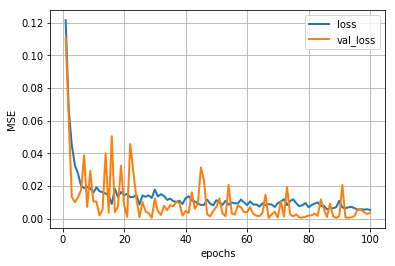

In [10]:
listaloss2 = []
listaval2 = []
for i in range(100):
    listaloss2.append(hist.history['loss'][i])
    listaval2.append(hist.history['val_loss'][i])

plt.plot(range(101)[1:],listaloss2,label='loss', linewidth=2)
plt.plot(range(101)[1:],listaval2,label='val_loss', linewidth=2)

plt.legend(['loss', 'val_loss'])
plt.ylabel('MSE')
plt.xlabel('epochs')
plt.grid(1)
plt.show()

En este caso, se volvió a realizar la misma red, pero con función de activación ReLU. El cual a simple vista parece presentar mejores resultados que Sigmoid.

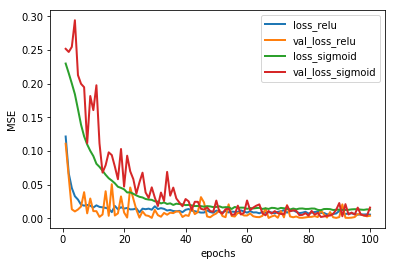

In [12]:
plt.plot(range(101)[1:],listaloss2,label='loss_relu', linewidth=2)
plt.plot(range(101)[1:],listaval2,label='val_loss_relu', linewidth=2)
plt.plot(range(101)[1:],listaloss,label='loss_sigmoid', linewidth=2)
plt.plot(range(101)[1:],listaval,label='val_loss_sigmoid', linewidth=2)

plt.legend(['loss_relu', 'val_loss_relu','loss_sigmoid','val_loss_sigmoid'])
plt.ylabel('MSE')
plt.xlabel('epochs')

plt.show()

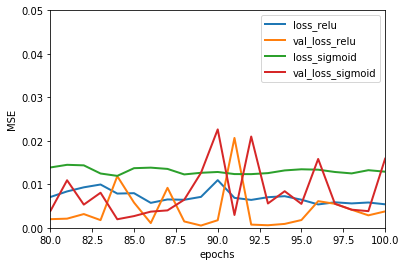

In [13]:
plt.plot(range(101)[1:],listaloss2,label='loss_relu', linewidth=2)
plt.plot(range(101)[1:],listaval2,label='val_loss_relu', linewidth=2)
plt.plot(range(101)[1:],listaloss,label='loss_sigmoid', linewidth=2)
plt.plot(range(101)[1:],listaval,label='val_loss_sigmoid', linewidth=2)

plt.legend(['loss_relu', 'val_loss_relu','loss_sigmoid','val_loss_sigmoid'])
plt.ylabel('MSE')
plt.xlabel('epochs')
plt.axis([80,100,0,0.05])

plt.show()

Finalmente, se comprueba lo enseñado en clases, donde se demuestra por medio del gráfico de mas arriba que el loss de entrenamiento ReLU es menor al loss de entrenamiento de Sigmoid, demostrando así que la función de activación ReLU es mejor al momento de entrenar una red.